In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [2]:
data_train_path = 'dataset/train'
data_test_path = 'dataset/test'
data_val_path = 'dataset/validation'

In [3]:
img_width = 180
img_height =180 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 1895 files belonging to 5 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_cat

['Disease_Free_Skin', 'Follicalitis', 'Seborrhea', 'Ticks', 'Yeast_Infection']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 755 files belonging to 5 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 1895 files belonging to 5 classes.


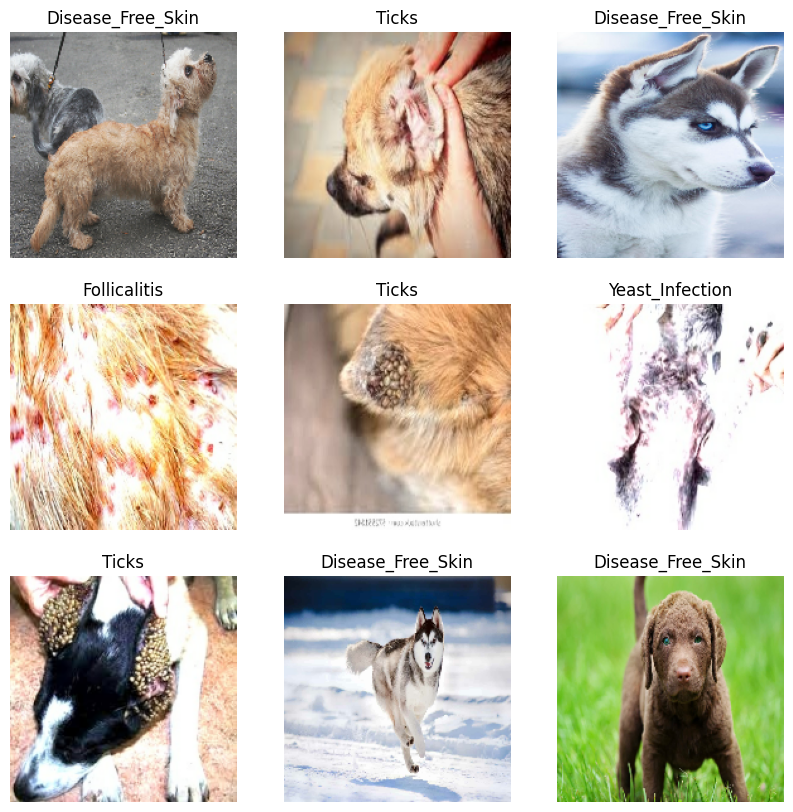

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(data_cat), activation='softmax')
])

In [13]:

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
epochs_size = 32
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/32


C:\Users\Nimesh\AppData\Roaming\Python\Python310\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



60/60 [==============================] - 41s 659ms/step - loss: 7.0349 - accuracy: 0.3325 - val_loss: 19.6579 - val_accuracy: 0.1801
Epoch 2/32
60/60 [==============================] - 38s 627ms/step - loss: 1.4573 - accuracy: 0.3689 - val_loss: 29.9516 - val_accuracy: 0.1801
Epoch 3/32
60/60 [==============================] - 36s 595ms/step - loss: 1.3107 - accuracy: 0.4654 - val_loss: 33.8701 - val_accuracy: 0.1801
Epoch 4/32
60/60 [==============================] - 37s 611ms/step - loss: 1.2212 - accuracy: 0.5103 - val_loss: 24.2690 - val_accuracy: 0.1960
Epoch 5/32
60/60 [==============================] - 38s 624ms/step - loss: 1.0758 - accuracy: 0.5784 - val_loss: 18.3371 - val_accuracy: 0.2146
Epoch 6/32
60/60 [==============================] - 35s 576ms/step - loss: 1.0491 - accuracy: 0.6090 - val_loss: 4.5775 - val_accuracy: 0.4265
Epoch 7/32
60/60 [==============================] - 33s 554ms/step - loss: 0.9213 - accuracy: 0.6433 - val_loss: 1.9552 - val_accuracy: 0.5338
Epoc

Text(0.5, 1.0, 'Loss')

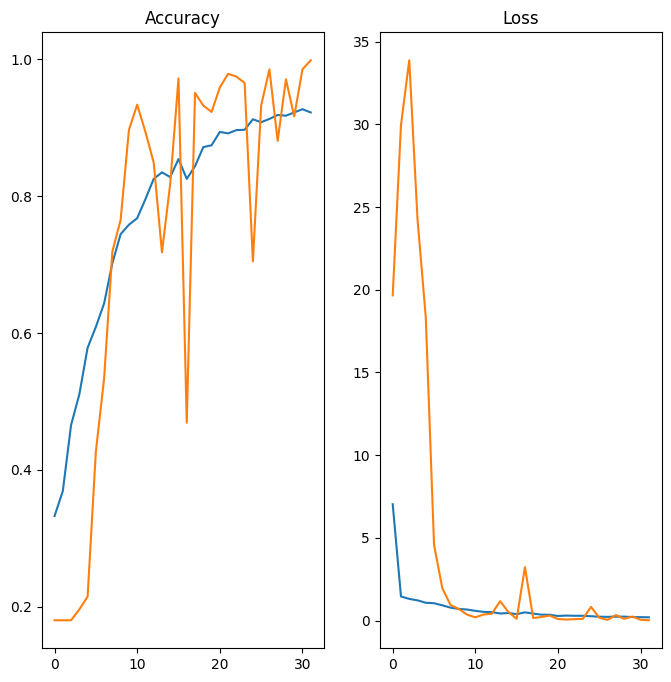

In [15]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [16]:
test_loss, test_accuracy = model.evaluate(data_test)
print(f'Test accuracy: {test_accuracy}')


60/60 [==============================] - 9s 153ms/step - loss: 0.0231 - accuracy: 0.9900
Test accuracy: 0.9899736046791077


60/60 [==============================] - 8s 139ms/step


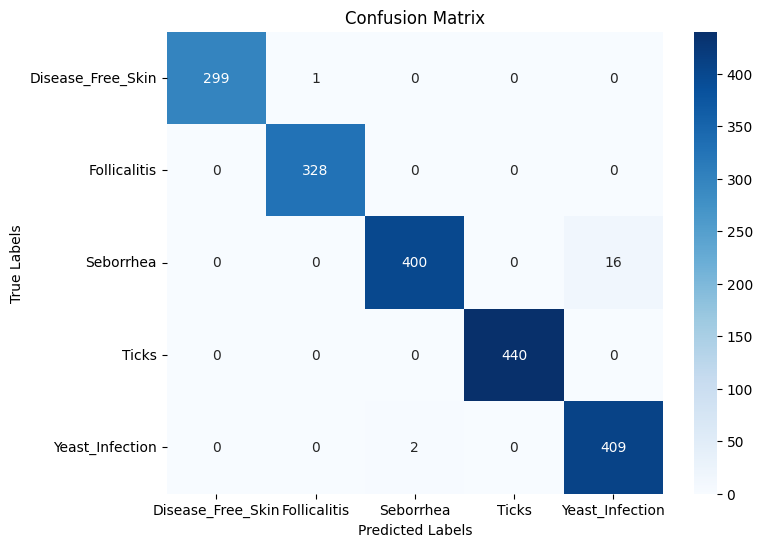

In [17]:

# Make predictions on the test data
predictions = model.predict(data_test)
predicted_labels = np.argmax(predictions, axis=1)

true_labels = np.concatenate([y for x, y in data_test], axis=0)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data_cat, yticklabels=data_cat)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
